# Non Linear Regression Analysis

## Objectives

*   Fit a non-linear model to the datapoints corrensponding to China's GDP from 1960 to 2014 in Python


If the data shows a curvy trend, then linear regression will not produce very accurate results when compared to a non-linear regression since linear regression presumes that the data is linear.


<h2 id="importing_libraries">Importing required libraries</h2>


In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [48]:
df = pd.read_csv("china_gdp.csv")
df.head(10)

,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


### Plotting the Dataset


In [49]:
def plot(dataframe, x, y):
    px.bar(dataframe, x=x, y=y).show()
    px.line(dataframe, x=x, y=y).show()
    px.scatter(dataframe, x=x, y=y).show()
    
plot(df, 'Year', 'Value')

It kind of looks like an either logistic or exponential function. The growth starts off slow, then from 2005 on forward, the growth is very significant. And finally, it decelerates slightly in the 2010s.

The formula for the logistic function is the following:

$$ \hat{Y} = \frac1{1+e^{-\beta\_1(X-\beta\_2)}}$$

$\beta\_1$: Controls the curve's steepness,

$\beta\_2$: Slides the curve on the x-axis.


### Building The Model

Now, let's build our regression model and initialize its parameters.


In [58]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

Our task here is to find the best parameters for our model. Lets first scale our x and y:


In [60]:
cols = [col for col in df.columns]
df[cols] = MinMaxScaler((0, 1)).fit_transform(df[cols])
df.head()

,Year,Value
0,0.000000,0.001213
1,0.018519,0.000279
2,0.037037,0.000000
3,0.055556,0.000331
4,0.074074,0.001201


#### How we find the best parameters for our fit line?

we can use **curve_fit** which uses non-linear least squares to fit our sigmoid function, to data. Optimize values for the parameters so that the sum of the squared residuals of sigmoid(xdata, \*popt) - ydata is minimized.

popt are our optimized parameters.


In [76]:
x_data = df['Year'].values
y_data = df['Value'].values

popt, pcov = curve_fit(sigmoid, x_data, y_data)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 18.869350, beta_2 = 0.896663


Now we plot our resulting regression model.


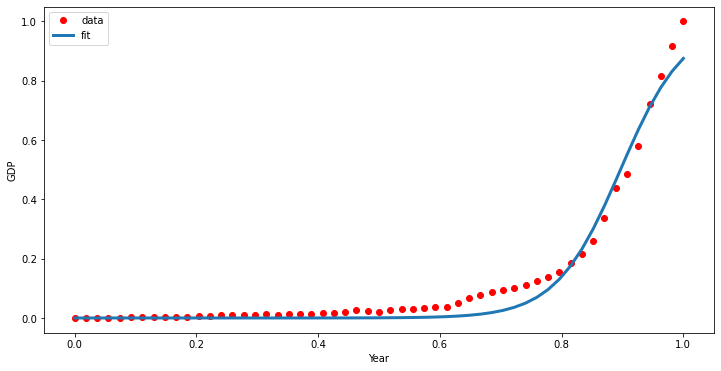

In [85]:
plt.figure(figsize=(12,6))

y_pred = sigmoid(x_data, popt[0],popt[1])
plt.plot(x_data, y_data, 'ro', label='data')
plt.plot(x_data,y_pred, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

## Evaluation

In [93]:
#Create training and test datasets
X = x_data
Y = y_data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 5)


In [97]:
# build the model using train set
popt, pcov = curve_fit(sigmoid, X_train, Y_train)

# predict using test set
y_hat = sigmoid(X_test, popt[0], popt[1])

# evaluation
print('The MAE value is', round(mean_absolute_error(Y_test, y_hat), 2))
print('The RMSE value is', round(np.sqrt(mean_squared_error(Y_test, y_hat)) ,3))
print('The R2 value is', round(r2_score(Y_test, y_hat), 4))

The MAE value is 0.03
The RMSE value is 0.054
The R2 value is 0.9752
